In [1]:
#运行这个代码可以让Python不显示warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
import pyproj

In [2]:
xinling = pd.read_csv(r'F:\徐州\xuzhou徐州五区县网格2.csv',encoding='gbk')
#arrive2.columns=['日期','出发时间','D编号','到达人数','O编号','出发人数']
xinling

,grid_id,centre_lng,centre_lat,left_up_lng,left_up_lat,left_down_lng,left_down_lat,right_up_lng,right_up_lat,right_down_lng,right_down_lat,city_id,city_name,district_id,district_name
0,ww56mus,117.329178,34.170914,117.328491,34.171600,117.328491,34.170227,117.329864,34.171600,117.329864,34.170227,1000516,徐州市,320303,云龙区
1,ww56gwd,117.227554,34.269791,117.226868,34.270477,117.226868,34.269104,117.228241,34.270477,117.228241,34.269104,1000516,徐州市,320303,云龙区
2,ww56s9g,117.272873,34.199753,117.272186,34.200439,117.272186,34.199066,117.273560,34.200439,117.273560,34.199066,1000516,徐州市,320303,云龙区
3,ww56g5p,117.212448,34.250565,117.211761,34.251251,117.211761,34.249878,117.213135,34.251251,117.213135,34.249878,1000516,徐州市,320303,云龙区
4,ww56gqz,117.223434,34.271164,117.222748,34.271851,117.222748,34.270477,117.224121,34.271851,117.224121,34.270477,1000516,徐州市,320303,云龙区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151455,ww57367,117.130051,34.334335,117.129364,34.335022,117.129364,34.333649,117.130737,34.335022,117.130737,34.333649,1000516,徐州市,320302,鼓楼区
151456,ww5739q,117.145157,34.328842,117.144470,34.329529,117.144470,34.328156,117.145843,34.329529,117.145843,34.328156,1000516,徐州市,320302,鼓楼区
151457,ww57662,117.169876,34.334335,117.169190,34.335022,117.169190,34.333649,117.170563,34.335022,117.170563,34.333649,1000516,徐州市,320302,鼓楼区
151458,ww57638,117.169876,34.330215,117.169190,34.330902,117.169190,34.329529,117.170563,34.330902,117.170563,34.329529,1000516,徐州市,320302,鼓楼区


In [3]:
xinling['区编号']=xinling.iloc[:,0]
xinling['经度']=xinling.iloc[:,1]
xinling['纬度']=xinling.iloc[:,2]

In [4]:
QSY=xinling.loc[:,['区编号','经度','纬度']]
QSY

,区编号,经度,纬度
0,ww56mus,117.329178,34.170914
1,ww56gwd,117.227554,34.269791
2,ww56s9g,117.272873,34.199753
3,ww56g5p,117.212448,34.250565
4,ww56gqz,117.223434,34.271164
...,...,...,...
151455,ww57367,117.130051,34.334335
151456,ww5739q,117.145157,34.328842
151457,ww57662,117.169876,34.334335
151458,ww57638,117.169876,34.330215


In [5]:
import geopandas
import matplotlib.pyplot as plt
line = geopandas.read_file(r'F:\徐州\线路\线路.shp',encoding='gbk')
stop=pd.read_excel(r'F:\徐州\表格\KH-1站点.xls')

In [6]:
stop=stop.sort_values(by='经度')
stop

,FID,stopcode,stopname,经度,纬度
6,6,210121,九里山(北),117.135633,34.280820
10,10,XYRJCZ,西苑人家(场站),117.135832,34.277209
12,12,,中海九樾,117.143105,34.281774
8,8,ZWYN,徐州植物园(南),117.154076,34.280838
5,5,60070,诚坤钢材市场(北),117.165993,34.283159
1,1,6120020,九龙湖公园(南),117.178249,34.285274
0,0,120100,建材中专(南),117.186812,34.285349
4,4,670121,堤北农贸市场|二环路(北),117.195917,34.285544
2,2,670190,二九宿舍(南),117.213182,34.285629
3,3,670220,杨庄(南),117.226433,34.291450


In [9]:
#-*-coding=utf-8 -*-\n",
import pyproj
import pandas as pd
import numpy as np
#data = pd.read_csv(\"test.csv\",sep=',',header='infer')#将第一行作为表头,
p1 = pyproj.Proj(init="epsg:4326")#wgs坐标系统的EPSG Code,
p2 = pyproj.Proj(init="epsg:32651")#UTM 51N坐标系统的EPSG Code\n",
lonprj, latprj = pyproj.transform(p1, p2,stop['经度'], stop['纬度'])
lonprj3, latprj3 = pyproj.transform(p1, p2,QSY['经度'], QSY['纬度'])

In [10]:
##将数组转换为PD\n",
stop['lons']=pd.DataFrame(lonprj)
stop['lats']=pd.DataFrame(latprj)
#line['lons']=pd.DataFrame(lonprj2)
#line['lats']=pd.DataFrame(latprj2)
QSY['lons']=pd.DataFrame(lonprj3)
QSY['lats']=pd.DataFrame(latprj3)

In [14]:
stop

,FID,stopcode,stopname,经度,纬度,lons,lats,geometry
6,6,210121,九里山(北),117.135633,34.280820,-35371.115984,3.809126e+06,POINT (-35371.11598390527 3809126.27149845)
10,10,XYRJCZ,西苑人家(场站),117.135832,34.277209,-30868.628715,3.809833e+06,POINT (-30868.62871548999 3809832.7291986453)
12,12,,中海九樾,117.143105,34.281774,-29035.955572,3.809398e+06,POINT (-29035.95557169034 3809398.4323940463)
8,8,ZWYN,徐州植物园(南),117.154076,34.280838,-32937.790434,3.809018e+06,POINT (-32937.790433969116 3809018.192193212)
5,5,60070,诚坤钢材市场(北),117.165993,34.283159,-36161.275042,3.809163e+06,POINT (-36161.27504204004 3809163.1900935313)
1,1,6120020,九龙湖公园(南),117.178249,34.285274,-40124.510910,3.808493e+06,POINT (-40124.510909937904 3808492.723794836)
0,0,120100,建材中专(南),117.186812,34.285349,-40119.598338,3.808895e+06,POINT (-40119.59833793016 3808894.9726925436)
4,4,670121,堤北农贸市场|二环路(北),117.195917,34.285544,-37304.952052,3.808993e+06,POINT (-37304.95205151627 3808993.2155954926)
2,2,670190,二九宿舍(南),117.213182,34.285629,-39424.457030,3.808961e+06,POINT (-39424.45702975185 3808961.078141681)
3,3,670220,杨庄(南),117.226433,34.291450,-38418.762596,3.808799e+06,POINT (-38418.7625962653 3808798.6800883734)


In [15]:
QSY

,区编号,经度,纬度,lons,lats,geometry
0,ww56mus,117.329178,34.170914,-22953.956952,3.795671e+06,POINT (-22953.956951656553 3795670.852514178)
1,ww56gwd,117.227554,34.269791,-31712.680638,3.807183e+06,POINT (-31712.680638363352 3807183.140981803)
2,ww56s9g,117.272873,34.199753,-27972.154486,3.799166e+06,POINT (-27972.15448565688 3799165.896358251)
3,ww56g5p,117.212448,34.250565,-33227.754585,3.805127e+06,POINT (-33227.75458505633 3805126.7115265634)
4,ww56gqz,117.223434,34.271164,-32083.954936,3.807357e+06,POINT (-32083.954935508664 3807357.337184346)
...,...,...,...,...,...,...
151455,ww57367,117.130051,34.334335,-40289.916609,3.814870e+06,POINT (-40289.91660904547 3814870.112977421)
151456,ww5739q,117.145157,34.328842,-38933.016510,3.814179e+06,POINT (-38933.01651049976 3814179.2181995884)
151457,ww57662,117.169876,34.334335,-36619.618067,3.814658e+06,POINT (-36619.61806662788 3814658.0036518783)
151458,ww57638,117.169876,34.330215,-36645.976475,3.814200e+06,POINT (-36645.97647538001 3814200.309984983)


#生成线路的线要素
from shapely.geometry import LineString
dianlon=line['lons']
dianlat=line['lats']
dianlist=[]
for i in range(0,len(line)):
    g=(dianlon[i],dianlat[i])
    dianlist.append(g)
    pass
dianlist
linestr = LineString(dianlist)
line['geometry']=linestr
line['geometry']

In [17]:
import math
###将所有小区匹配到最近的站点上
#for k in range(0,len(lineQSY)):
match=[]
nearestd=[]
for k in range(0,len(QSY)):###range写法要求索引连续完整
    distance=[]
    for i in range(0,len(stop)):        
        x1 = stop.loc[i,'lons']
        y1 = stop.loc[i,'lats']
        x2 = QSY.loc[k,'lons']
        y2 = QSY.loc[k,'lats']
        #print(math.sqrt((x2-x1)**2+(y2-y1)**2))
        distance.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    #print(distance)
    #print(len(distance))
    # 求列表最小值及索引
    min_value = min(distance) # 求列表最小值
    min_idx = distance.index(min_value) # 求最小值对应索引
    #print(min_value)
    #print(min_idx )
    nearestd.append(min_value)
    match.append(min_idx)

In [18]:
###最近站点整理
QSY['最近站名索引']=match
QSY['最近站距离']=nearestd
QSY['最近站名']=None
QSY['最近站编号']=None

In [20]:
for k in range(0,len(QSY)):
    sy=QSY['最近站名索引'].loc[k]
    QSY['最近站名'].loc[k]=stop['stopname'].loc[sy]
    QSY['最近站编号'].loc[k]=stop['stopname'].loc[sy]
QSY

,区编号,经度,纬度,lons,lats,geometry,最近站名索引,最近站距离,最近站名,最近站编号
0,ww56mus,117.329178,34.170914,-22953.956952,3.795671e+06,POINT (-22953.956951656553 3795670.852514178),13,14981.731225,宝莲寺,宝莲寺
1,ww56gwd,117.227554,34.269791,-31712.680638,3.807183e+06,POINT (-31712.680638363352 3807183.140981803),8,2206.424021,徐州植物园(南),徐州植物园(南)
2,ww56s9g,117.272873,34.199753,-27972.154486,3.799166e+06,POINT (-27972.15448565688 3799165.896358251),11,10154.297459,开发区中学2,开发区中学2
3,ww56g5p,117.212448,34.250565,-33227.754585,3.805127e+06,POINT (-33227.75458505633 3805126.7115265634),8,3902.268698,徐州植物园(南),徐州植物园(南)
4,ww56gqz,117.223434,34.271164,-32083.954936,3.807357e+06,POINT (-32083.954935508664 3807357.337184346),8,1867.478091,徐州植物园(南),徐州植物园(南)
...,...,...,...,...,...,...,...,...,...,...
151455,ww57367,117.130051,34.334335,-40289.916609,3.814870e+06,POINT (-40289.91660904547 3814870.112977421),2,5972.077777,二九宿舍(南),二九宿舍(南)
151456,ww5739q,117.145157,34.328842,-38933.016510,3.814179e+06,POINT (-38933.01651049976 3814179.2181995884),2,5241.230719,二九宿舍(南),二九宿舍(南)
151457,ww57662,117.169876,34.334335,-36619.618067,3.814658e+06,POINT (-36619.61806662788 3814658.0036518783),5,5513.896478,诚坤钢材市场(北),诚坤钢材市场(北)
151458,ww57638,117.169876,34.330215,-36645.976475,3.814200e+06,POINT (-36645.97647538001 3814200.309984983),5,5060.386574,诚坤钢材市场(北),诚坤钢材市场(北)


In [22]:
#QSY=QSY.drop(QSY['最近站距离']>300)
QSY.drop(index=QSY[QSY['最近站距离']>300].index[0])
QSY

,区编号,经度,纬度,lons,lats,geometry,最近站名索引,最近站距离,最近站名,最近站编号
0,ww56mus,117.329178,34.170914,-22953.956952,3.795671e+06,POINT (-22953.956951656553 3795670.852514178),13,14981.731225,宝莲寺,宝莲寺
1,ww56gwd,117.227554,34.269791,-31712.680638,3.807183e+06,POINT (-31712.680638363352 3807183.140981803),8,2206.424021,徐州植物园(南),徐州植物园(南)
2,ww56s9g,117.272873,34.199753,-27972.154486,3.799166e+06,POINT (-27972.15448565688 3799165.896358251),11,10154.297459,开发区中学2,开发区中学2
3,ww56g5p,117.212448,34.250565,-33227.754585,3.805127e+06,POINT (-33227.75458505633 3805126.7115265634),8,3902.268698,徐州植物园(南),徐州植物园(南)
4,ww56gqz,117.223434,34.271164,-32083.954936,3.807357e+06,POINT (-32083.954935508664 3807357.337184346),8,1867.478091,徐州植物园(南),徐州植物园(南)
...,...,...,...,...,...,...,...,...,...,...
151455,ww57367,117.130051,34.334335,-40289.916609,3.814870e+06,POINT (-40289.91660904547 3814870.112977421),2,5972.077777,二九宿舍(南),二九宿舍(南)
151456,ww5739q,117.145157,34.328842,-38933.016510,3.814179e+06,POINT (-38933.01651049976 3814179.2181995884),2,5241.230719,二九宿舍(南),二九宿舍(南)
151457,ww57662,117.169876,34.334335,-36619.618067,3.814658e+06,POINT (-36619.61806662788 3814658.0036518783),5,5513.896478,诚坤钢材市场(北),诚坤钢材市场(北)
151458,ww57638,117.169876,34.330215,-36645.976475,3.814200e+06,POINT (-36645.97647538001 3814200.309984983),5,5060.386574,诚坤钢材市场(北),诚坤钢材市场(北)


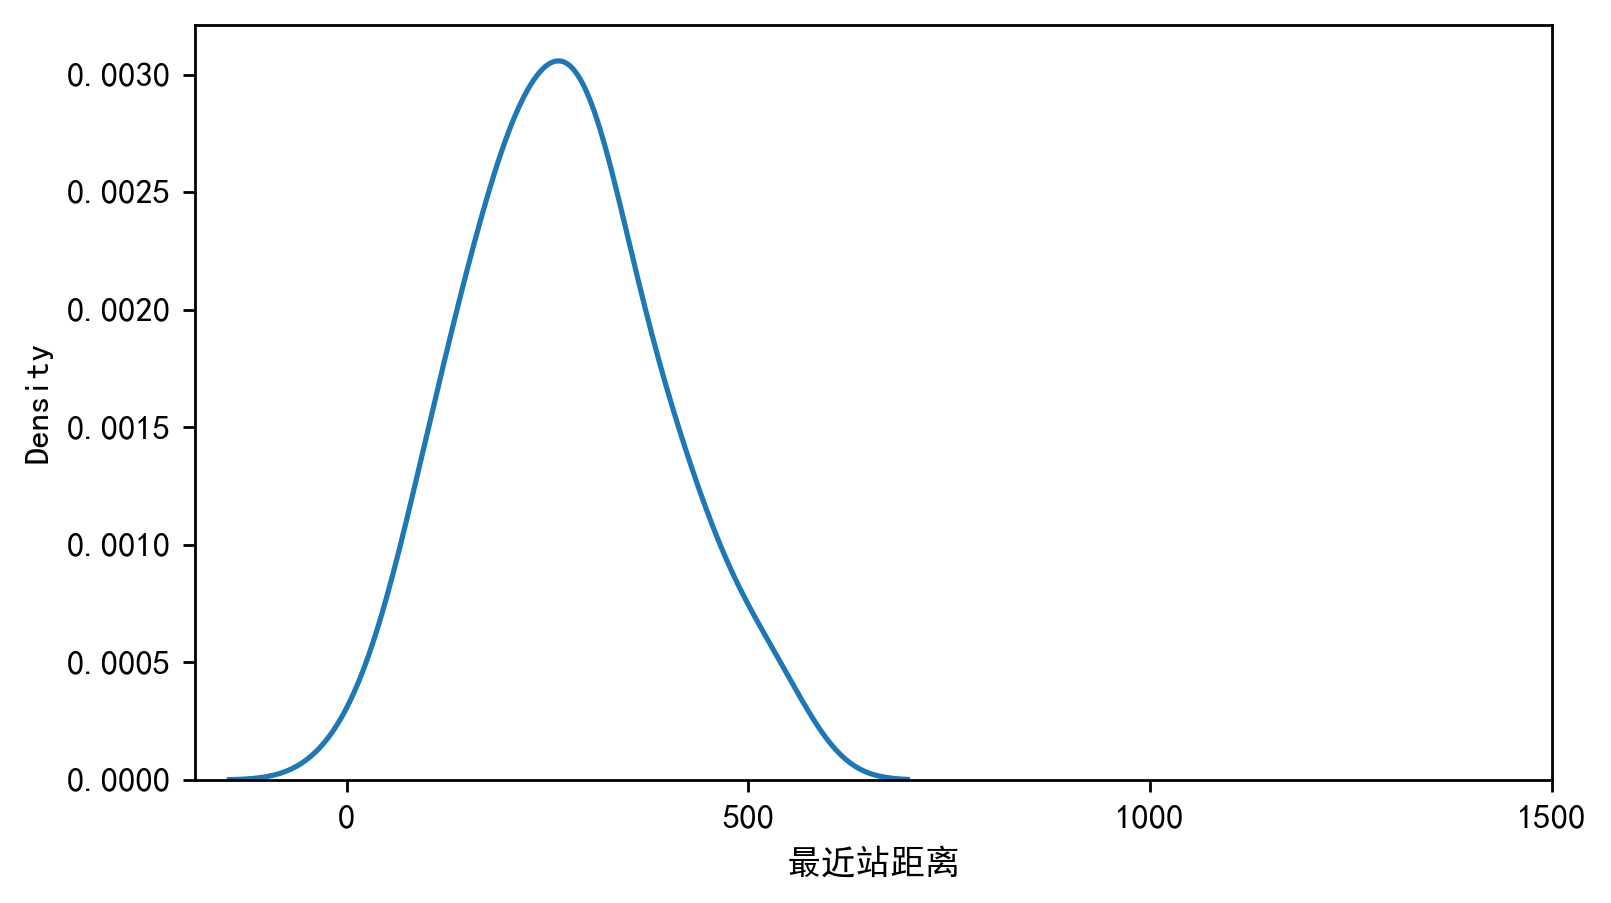

In [221]:
#绘制栅格到最近的站点的距离密度分布
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)   
ax1      = plt.subplot(111)
sns.kdeplot(QSY[QSY['最近站距离']<1000]['最近站距离'])
plt.xticks(range(0,2000,500),range(0,2000,500))##实际范围和标志，最后是步长
plt.show()
###沿线一公里内的栅格，距离最近的站点的距离大部分在在1500米以内

In [222]:
d_time = datetime.datetime.strptime('6:30:00', '%H:%M:%S')##!!!!
d_time1 = datetime.datetime.strptime('18:30:00', '%H:%M:%S')###!!!!注意区分白天和晚班车

In [223]:
arrive2 = pd.read_csv(r'F:\徐州\xuzhou_res\xuzhou_res\setOutRes\20211008.csv',encoding='utf-8')
arrive2.columns=['日期','出发时间','O编号','出发人数','D编号','到达人数']
arrive2 

,日期,出发时间,O编号,出发人数,D编号,到达人数
0,20211008,12:00-12:30,ww56ftw,237,ww57jb2,1
1,20211008,22:00-22:30,ww56c0b,12,ww56ft5,1
2,20211008,06:00-06:30,ww56fps,13,ww56fwe,1
3,20211008,07:00-07:30,ww5e54k,81,ww5e51z,6
4,20211008,06:30-07:00,ww56by2,191,ww56cv0,3
...,...,...,...,...,...,...
3254767,20211008,21:30-22:00,ww56d8q,17,ww56ggw,1
3254768,20211008,14:30-15:00,ww56t46,26,ww56u78,2
3254769,20211008,15:30-16:00,ww5eh0e,13,ww5e5cb,1
3254770,20211008,18:30-19:00,ww56df5,106,ww563xs,1


In [224]:
###切分时间字段
###筛选出这段时间内到达的栅格人群，线路
o=arrive2['出发时间'].str.split('-',expand=True)
o['起始时间']=o.loc[:,[0]]
o['结束时间']=o.loc[:,[1]]
arrive2['出发起始时间']=o['起始时间']
arrive2['出发结束时间']=o['结束时间']
arrive2

,日期,出发时间,O编号,出发人数,D编号,到达人数,出发起始时间,出发结束时间
0,20211008,12:00-12:30,ww56ftw,237,ww57jb2,1,12:00,12:30
1,20211008,22:00-22:30,ww56c0b,12,ww56ft5,1,22:00,22:30
2,20211008,06:00-06:30,ww56fps,13,ww56fwe,1,06:00,06:30
3,20211008,07:00-07:30,ww5e54k,81,ww5e51z,6,07:00,07:30
4,20211008,06:30-07:00,ww56by2,191,ww56cv0,3,06:30,07:00
...,...,...,...,...,...,...,...,...
3254767,20211008,21:30-22:00,ww56d8q,17,ww56ggw,1,21:30,22:00
3254768,20211008,14:30-15:00,ww56t46,26,ww56u78,2,14:30,15:00
3254769,20211008,15:30-16:00,ww5eh0e,13,ww5e5cb,1,15:30,16:00
3254770,20211008,18:30-19:00,ww56df5,106,ww563xs,1,18:30,19:00


In [225]:
#根据时间筛选栅格数据
import datetime
list=[] 
n=len(arrive2)###!!!!!这个参数记得改\n",
for i in range(0, n):    
    # 当前时间\n",
    s_time = datetime.datetime.strptime(arrive2.loc[i,'出发起始时间'], '%H:%M')
    e_time = datetime.datetime.strptime(arrive2.loc[i,'出发结束时间'], '%H:%M')
    # 当前时间\n",
    #n_time = datetime.datetime.now()\n","    #判断时间\n","    #n_time =BUS_GPS.loc[1,'RECDATETIME']\n",
    # 判断当前时间是否在范围时间内\n",
    if s_time > d_time and e_time<d_time1:
        k=i
        list.append(k)##要用圆括号,且不要写成list=list.append(k)的赋值形式\n",
        #读取经纬度
        pass
DSY=arrive2.loc[list,:]

In [226]:
DSY

,日期,出发时间,O编号,出发人数,D编号,到达人数,出发起始时间,出发结束时间
0,20211008,12:00-12:30,ww56ftw,237,ww57jb2,1,12:00,12:30
3,20211008,07:00-07:30,ww5e54k,81,ww5e51z,6,07:00,07:30
5,20211008,11:00-11:30,ww5754y,96,ww57557,1,11:00,11:30
8,20211008,14:00-14:30,ww56ujt,173,ww56gsr,1,14:00,14:30
9,20211008,13:00-13:30,ww571z9,51,ww574h4,1,13:00,13:30
...,...,...,...,...,...,...,...,...
3254759,20211008,10:00-10:30,ww57734,86,ww574g8,3,10:00,10:30
3254763,20211008,10:30-11:00,ww574cp,104,ww57578,1,10:30,11:00
3254766,20211008,15:30-16:00,ww567m9,63,ww567m9,15,15:30,16:00
3254768,20211008,14:30-15:00,ww56t46,26,ww56u78,2,14:30,15:00


In [227]:
lineQSY

,区编号,经度,纬度,lons,lats,geometry,project,geometry_orgin,diff,最近站名索引,最近站距离,最近站名,最近站编号
0,ww5713p,117.135544,34.283524,-40110.494903,3.809196e+06,POINT (-39965.107295379945 3809024.1875716033),1046.006179,POINT (-40110.494903228944 3809195.7641564626),224.891265,0,300.929190,建材中专(南),建材中专(南)
1,ww56cxc,117.138290,34.276657,-39901.324405,3.808418e+06,POINT (-40067.91193592001 3808497.6339962855),0.000000,POINT (-39901.32440537622 3808418.2749732556),184.524415,1,235.276099,九龙湖公园(南),九龙湖公园(南)
2,ww56crt,117.132797,34.275284,-40416.762168,3.808295e+06,POINT (-40372.336605769815 3808471.371154026),305.555423,POINT (-40416.76216800348 3808295.0137090506),181.866927,1,352.845683,九龙湖公园(南),九龙湖公园(南)
3,ww57125,117.130051,34.278030,-40652.393259,3.808615e+06,POINT (-40357.333195892315 3808569.870717806),405.191091,POINT (-40652.39325876965 3808614.8141357456),298.463317,1,541.817151,九龙湖公园(南),九龙湖公园(南)
4,ww56cx8,117.136917,34.275284,-40036.799817,3.808273e+06,POINT (-40067.91193592001 3808497.6339962855),0.000000,POINT (-40036.7998166366 3808273.031525016),226.747071,1,236.554284,九龙湖公园(南),九龙湖公园(南)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,ww57190,117.136917,34.283524,-39983.853437,3.809188e+06,POINT (-39913.373638120574 3809059.857881236),1109.165559,POINT (-39983.853436529054 3809188.437675828),146.629348,0,323.339411,建材中专(南),建材中专(南)
62,ww5719n,117.145157,34.283524,-39224.007018,3.809145e+06,POINT (-39289.056116667874 3808921.571691153),1772.387042,POINT (-39224.00701761572 3809144.5152177247),232.239534,2,271.715602,二九宿舍(南),二九宿舍(南)
63,ww5718s,117.142410,34.280777,-39494.922000,3.808854e+06,POINT (-39435.61760311102 3808966.9393417495),1618.734326,POINT (-39494.921999888844 3808854.0151853287),127.549506,2,128.170935,二九宿舍(南),二九宿舍(南)
64,ww5718w,117.145157,34.280777,-39241.631956,3.808839e+06,POINT (-39231.773645709814 3808905.162539506),1831.992521,POINT (-39241.63195552677 3808839.3818501807),66.515302,2,219.624669,二九宿舍(南),二九宿舍(南)


In [228]:
df1 = pd.DataFrame()
for i in range(0,len(lineQSY)):
    sg=DSY.loc[DSY['D编号'].str.contains(lineQSY['区编号'].iloc[i])]  
    df1 = df1.append(sg,ignore_index = True)
df1

,日期,出发时间,O编号,出发人数,D编号,到达人数,出发起始时间,出发结束时间
0,20211008,08:00-08:30,ww56cgy,246,ww5713p,1,08:00,08:30
1,20211008,10:00-10:30,ww56bt7,131,ww5713p,1,10:00,10:30
2,20211008,07:30-08:00,ww5713p,32,ww5713p,7,07:30,08:00
3,20211008,08:30-09:00,ww570t8,25,ww5713p,1,08:30,09:00
4,20211008,09:00-09:30,ww5731k,94,ww5713p,1,09:00,09:30
...,...,...,...,...,...,...,...,...
2185,20211008,07:00-07:30,ww571xt,158,ww5718z,1,07:00,07:30
2186,20211008,13:30-14:00,ww5718z,5,ww5718z,1,13:30,14:00
2187,20211008,15:30-16:00,ww56eqm,97,ww5718z,1,15:30,16:00
2188,20211008,17:30-18:00,ww5717f,37,ww5718z,1,17:30,18:00


In [229]:
df3 = pd.DataFrame()
for i in range(0,len(lineQSY)):
    sg=df1.loc[df1['O编号'].str.contains(lineQSY['区编号'].iloc[i])]  
    df3 = df3.append(sg,ignore_index = True)
df3

,日期,出发时间,O编号,出发人数,D编号,到达人数,出发起始时间,出发结束时间
0,20211008,07:30-08:00,ww5713p,32,ww5713p,7,07:30,08:00
1,20211008,08:00-08:30,ww5713p,31,ww5713p,4,08:00,08:30
2,20211008,10:30-11:00,ww5713p,12,ww5713p,2,10:30,11:00
3,20211008,11:30-12:00,ww5713p,17,ww5713p,4,11:30,12:00
4,20211008,07:00-07:30,ww5713p,21,ww5713p,3,07:00,07:30
...,...,...,...,...,...,...,...,...
136,20211008,10:30-11:00,ww5718z,3,ww5718q,1,10:30,11:00
137,20211008,11:30-12:00,ww5718z,5,ww5718z,1,11:30,12:00
138,20211008,14:00-14:30,ww5718z,2,ww5718z,1,14:00,14:30
139,20211008,09:00-09:30,ww5718z,2,ww5718z,2,09:00,09:30


In [230]:
stop

,FID,stopcode,stopname,经度,纬度,lons,lats,geometry
6,6,210121,九里山(北),117.135633,34.280820,-35371.115984,3.809126e+06,POINT (-35371.11598390527 3809126.27149845)
10,10,XYRJCZ,西苑人家(场站),117.135832,34.277209,-30868.628715,3.809833e+06,POINT (-30868.62871548999 3809832.7291986453)
12,12,,中海九樾,117.143105,34.281774,-29035.955572,3.809398e+06,POINT (-29035.95557169034 3809398.4323940463)
8,8,ZWYN,徐州植物园(南),117.154076,34.280838,-32937.790434,3.809018e+06,POINT (-32937.790433969116 3809018.192193212)
5,5,60070,诚坤钢材市场(北),117.165993,34.283159,-36161.275042,3.809163e+06,POINT (-36161.27504204004 3809163.1900935313)
1,1,6120020,九龙湖公园(南),117.178249,34.285274,-40124.510910,3.808493e+06,POINT (-40124.510909937904 3808492.723794836)
0,0,120100,建材中专(南),117.186812,34.285349,-40119.598338,3.808895e+06,POINT (-40119.59833793016 3808894.9726925436)
4,4,670121,堤北农贸市场|二环路(北),117.195917,34.285544,-37304.952052,3.808993e+06,POINT (-37304.95205151627 3808993.2155954926)
2,2,670190,二九宿舍(南),117.213182,34.285629,-39424.457030,3.808961e+06,POINT (-39424.45702975185 3808961.078141681)
3,3,670220,杨庄(南),117.226433,34.291450,-38418.762596,3.808799e+06,POINT (-38418.7625962653 3808798.6800883734)


In [231]:
import math
###将所有小区匹配到最近的站点上
#for k in range(0,len(lineQSY)):
match=[]
nearestd=[]
for k in range(0,len(lineQSY)):###range写法要求索引连续完整
    distance=[]
    for i in range(0,len(stop)):        
        x1 = stop.loc[i,'lons']
        y1 = stop.loc[i,'lats']
        x2 = lineQSY.loc[k,'lons']
        y2 = lineQSY.loc[k,'lats']
        #print(math.sqrt((x2-x1)**2+(y2-y1)**2))
        distance.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    #print(distance)
    #print(len(distance))
    # 求列表最小值及索引
    min_value = min(distance) # 求列表最小值
    min_idx = distance.index(min_value) # 求最小值对应索引
    #print(min_value)
    #print(min_idx )
    nearestd.append(min_value)
    match.append(min_idx)
###最近站点整理
lineQSY['最近站名索引']=match
lineQSY['最近站距离']=nearestd
lineQSY['最近站名']=None
lineQSY['最近站编号']=None
for k in range(0,len(lineQSY)):
    sy=lineQSY['最近站名索引'].loc[k]
    lineQSY['最近站名'].loc[k]=stop['stopname'].loc[sy]
    lineQSY['最近站编号'].loc[k]=stop['stopcode'].loc[sy]
lineQSY

,区编号,经度,纬度,lons,lats,geometry,project,geometry_orgin,diff,最近站名索引,最近站距离,最近站名,最近站编号
0,ww5713p,117.135544,34.283524,-40110.494903,3.809196e+06,POINT (-39965.107295379945 3809024.1875716033),1046.006179,POINT (-40110.494903228944 3809195.7641564626),224.891265,0,300.929190,建材中专(南),120100
1,ww56cxc,117.138290,34.276657,-39901.324405,3.808418e+06,POINT (-40067.91193592001 3808497.6339962855),0.000000,POINT (-39901.32440537622 3808418.2749732556),184.524415,1,235.276099,九龙湖公园(南),6120020
2,ww56crt,117.132797,34.275284,-40416.762168,3.808295e+06,POINT (-40372.336605769815 3808471.371154026),305.555423,POINT (-40416.76216800348 3808295.0137090506),181.866927,1,352.845683,九龙湖公园(南),6120020
3,ww57125,117.130051,34.278030,-40652.393259,3.808615e+06,POINT (-40357.333195892315 3808569.870717806),405.191091,POINT (-40652.39325876965 3808614.8141357456),298.463317,1,541.817151,九龙湖公园(南),6120020
4,ww56cx8,117.136917,34.275284,-40036.799817,3.808273e+06,POINT (-40067.91193592001 3808497.6339962855),0.000000,POINT (-40036.7998166366 3808273.031525016),226.747071,1,236.554284,九龙湖公园(南),6120020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,ww57190,117.136917,34.283524,-39983.853437,3.809188e+06,POINT (-39913.373638120574 3809059.857881236),1109.165559,POINT (-39983.853436529054 3809188.437675828),146.629348,0,323.339411,建材中专(南),120100
62,ww5719n,117.145157,34.283524,-39224.007018,3.809145e+06,POINT (-39289.056116667874 3808921.571691153),1772.387042,POINT (-39224.00701761572 3809144.5152177247),232.239534,2,271.715602,二九宿舍(南),670190
63,ww5718s,117.142410,34.280777,-39494.922000,3.808854e+06,POINT (-39435.61760311102 3808966.9393417495),1618.734326,POINT (-39494.921999888844 3808854.0151853287),127.549506,2,128.170935,二九宿舍(南),670190
64,ww5718w,117.145157,34.280777,-39241.631956,3.808839e+06,POINT (-39231.773645709814 3808905.162539506),1831.992521,POINT (-39241.63195552677 3808839.3818501807),66.515302,2,219.624669,二九宿舍(南),670190


In [232]:
##将栅格关联到站点
spaceod=df3
spaceod['出发站']=None
spaceod['到达站']=None
spaceod['出发站编号']=0
spaceod['到达站编号']=0
for i in range(0,len(lineQSY)):
    sg=spaceod.loc[spaceod['O编号'].str.contains(lineQSY['区编号'].iloc[i])] 
    #print(sg)
    k=sg.index
    spaceod['出发站'].loc[k]=lineQSY['最近站名'].iloc[i]
    spaceod['出发站编号'].loc[k]=lineQSY['最近站编号'].iloc[i]
for i in range(0,len(lineQSY)):
    sg=spaceod.loc[spaceod['D编号'].str.contains(lineQSY['区编号'].iloc[i])] 
    #print(sg)
    k=sg.index
    spaceod['到达站'].loc[k]=lineQSY['最近站名'].iloc[i]
    spaceod['到达站编号'].loc[k]=lineQSY['最近站编号'].iloc[i]

#获取站点的时间戳
stod=spaceod
print('stod')
print(stod)
#去除空值
stod.dropna()
print(stod)


stod
           日期         出发时间      O编号  出发人数      D编号  到达人数 出发起始时间 出发结束时间  \
0    20211008  07:30-08:00  ww5713p    32  ww5713p     7  07:30  08:00   
1    20211008  08:00-08:30  ww5713p    31  ww5713p     4  08:00  08:30   
2    20211008  10:30-11:00  ww5713p    12  ww5713p     2  10:30  11:00   
3    20211008  11:30-12:00  ww5713p    17  ww5713p     4  11:30  12:00   
4    20211008  07:00-07:30  ww5713p    21  ww5713p     3  07:00  07:30   
..        ...          ...      ...   ...      ...   ...    ...    ...   
136  20211008  10:30-11:00  ww5718z     3  ww5718q     1  10:30  11:00   
137  20211008  11:30-12:00  ww5718z     5  ww5718z     1  11:30  12:00   
138  20211008  14:00-14:30  ww5718z     2  ww5718z     1  14:00  14:30   
139  20211008  09:00-09:30  ww5718z     2  ww5718z     2  09:00  09:30   
140  20211008  13:30-14:00  ww5718z     5  ww5718z     1  13:30  14:00   

         出发站      到达站   出发站编号   到达站编号  
0    建材中专(南)  建材中专(南)  120100  120100  
1    建材中专(南)  建材中专(南)  120

In [233]:
list=[]
r=stod.index
for i in r:
    if stod['出发站'].loc[i]==stod['到达站'].loc[i]:
        list.append(i)
stod=stod.drop(list,axis=0)
stod
list=[]
r=stod.index
for i in r:
    if stod['D编号'].loc[i]==stod['O编号'].loc[i]:
        list.append(i)
stod=stod.drop(list,axis=0)
stod

,日期,出发时间,O编号,出发人数,D编号,到达人数,出发起始时间,出发结束时间,出发站,到达站,出发站编号,到达站编号
21,20211008,15:00-15:30,ww5713p,16,ww56cx9,1,15:00,15:30,建材中专(南),九龙湖公园(南),120100,6120020
22,20211008,07:30-08:00,ww5713p,32,ww5718q,1,07:30,08:00,建材中专(南),二九宿舍(南),120100,670190
23,20211008,11:30-12:00,ww5713p,17,ww5718v,1,11:30,12:00,建材中专(南),二九宿舍(南),120100,670190
25,20211008,14:30-15:00,ww56cx9,18,ww5713p,1,14:30,15:00,九龙湖公园(南),建材中专(南),6120020,120100
49,20211008,11:30-12:00,ww56cx9,21,ww5712t,1,11:30,12:00,九龙湖公园(南),建材中专(南),6120020,120100
50,20211008,08:30-09:00,ww56cx9,45,ww5718v,1,08:30,09:00,九龙湖公园(南),二九宿舍(南),6120020,670190
51,20211008,14:30-15:00,ww56cx9,18,ww5718v,1,14:30,15:00,九龙湖公园(南),二九宿舍(南),6120020,670190
67,20211008,13:00-13:30,ww5712t,10,ww5718v,1,13:00,13:30,建材中专(南),二九宿舍(南),120100,670190
99,20211008,13:00-13:30,ww5718v,19,ww5713p,1,13:00,13:30,二九宿舍(南),建材中专(南),670190,120100
100,20211008,09:30-10:00,ww5718v,19,ww56cx9,1,09:30,10:00,二九宿舍(南),九龙湖公园(南),670190,6120020


In [235]:
path=r'F:\徐州\\'+'KH-1'+'\\'+'OD'+'.csv'
stod.to_csv(path)
data = pd.read_csv(path)
data.to_excel(r'F:\徐州\\'+'KH-1'+'\\'+'流量'+'.xlsx')
print('OD计算完毕')

OD计算完毕


In [238]:
data2 = data.drop_duplicates(subset=['出发站','到达站'],keep='first')
data2['到达人数OD']=0
data2['出发人数OD']=0
sum=0
sum1=0
sumdata=pd.DataFrame()
for i in range(0,len(data2)):
    p=0
    pm=0
    for j in range(0,len(data)):
        if data['出发站'].iloc[j]==data2['出发站'].iloc[i]:
            p1=data['到达人数'].iloc[j]
            p2=data['出发人数'].iloc[j]
            p=p+p1
            pm=pm+p2
    data2['到达人数OD'].iloc[i]=p
    data2['出发人数OD'].iloc[i]=pm
    sum=sum+pm
    sum1=sum1+p
print(data2)
sumdata = sumdata.append(data, ignore_index = True)
print(sum)
print(sum1)

   Unnamed: 0        日期         出发时间      O编号  出发人数      D编号  到达人数 出发起始时间  \
0          21  20211008  15:00-15:30  ww5713p    16  ww56cx9     1  15:00   
1          22  20211008  07:30-08:00  ww5713p    32  ww5718q     1  07:30   
3          25  20211008  14:30-15:00  ww56cx9    18  ww5713p     1  14:30   
5          50  20211008  08:30-09:00  ww56cx9    45  ww5718v     1  08:30   
8          99  20211008  13:00-13:30  ww5718v    19  ww5713p     1  13:00   
9         100  20211008  09:30-10:00  ww5718v    19  ww56cx9     1  09:30   

  出发结束时间       出发站       到达站    出发站编号    到达站编号  到达人数OD  出发人数OD  
0  15:30   建材中专(南)  九龙湖公园(南)   120100  6120020       4      75  
1  08:00   建材中专(南)   二九宿舍(南)   120100   670190       4      75  
3  15:00  九龙湖公园(南)   建材中专(南)  6120020   120100       4     102  
5  09:00  九龙湖公园(南)   二九宿舍(南)  6120020   670190       4     102  
8  13:30   二九宿舍(南)   建材中专(南)   670190   120100       2      38  
9  10:00   二九宿舍(南)  九龙湖公园(南)   670190  6120020       2      38  
430
2

In [237]:
data2.to_csv(r'F:\徐州\KH-1\站点OD.csv')
data2.to_excel(r'F:\徐州\KH-1\站点OD.xlsx')